## Exercise 02 - Evaluation of Classifiers

## Machine Learning tasks

What kind of machine learning tasks are the following scenarios (e.g., classification/regression, supervised/unsupervised, ...)?

1. We collected a large amount of tweets and we want to identify popular topics.
2. Given the graph of a social network and pairs of users and the parties they voted for, we want to predict the voting behavior of the rest of people.
3. We have access to a database of a used car dealer. It holds data about the cars and their sell price. We want to predict the price of new cars that they try to sell.
4. We want to predict the second word of a sentences for a large collection of sentences.
5. Given a collection of cat images and the type of cat in each image, predict the type of cat in new images uploaded to reddit.

Answer:

## F1-score

In this exercise you will implement the f1 score as a scoring function that operates on two inputs: an array of true classes and an array of predicted classes.

You can check your results with the implementations of sklearn. 
If you have not already installed sklearn and you use Anaconda, install it by first activating your environment (e.g., `conda activate idl21`), and then use `conda install scikit-learn`.

In [3]:
import numpy as np
import sklearn.metrics
import sklearn.datasets
from typing import Tuple

### For now, assume that you only evaluate binary classifiers.

In [11]:
def recall(y_true: np.ndarray, y_pred: np.ndarray, pos_class=1) -> float:
    """Compute binary recall

    Args:
        y_true (np.ndarray): true classes
        y_pred (np.ndarray): predicted classes
        pos_class (int, optional): class label that is considered a positive example. Defaults to 1.

    Returns:
        float: recall
    """
    tp = sum((y_true == y_pred) & (y_true == pos_class))
    fn = sum((y_true != y_pred) & (y_true == pos_class))
    return tp / (tp + fn)


def precision(y_true: np.ndarray, y_pred: np.ndarray, pos_class=1) -> float:
    tp = sum((y_true == y_pred) & (y_true == pos_class))
    fp = sum((y_pred == pos_class) & (y_true != pos_class))
    return tp / (tp + fp)

def f1_score(y_true: np.ndarray, y_pred: np.ndarray, pos_class=1) -> float:
    rec = recall(y_true, y_pred, pos_class=pos_class)
    pr = precision(y_true, y_pred, pos_class=pos_class)
    if rec == 0 and pr == 0:
        return 0
    return 2 * rec * pr / (rec + pr)

In [12]:
X, y = sklearn.datasets.make_classification(n_classes=2 ,random_state = 0)
print(X,y)
rng = np.random.default_rng(0)

for i in range(4):
    y_pred = rng.permutation(y)
    print(f"Example {i}")
    print("F1 (your implementation): ", f1_score(y, y_pred, pos_class=1))
    print("F1 (sklearn): ", sklearn.metrics.f1_score(y, y_pred))

Example 0
F1 (your implementation):  0.5
F1 (sklearn):  0.5
Example 1
F1 (your implementation):  0.52
F1 (sklearn):  0.52
Example 2
F1 (your implementation):  0.41999999999999993
F1 (sklearn):  0.41999999999999993
Example 3
F1 (your implementation):  0.54
F1 (sklearn):  0.54


### Now implement the macro-F1 score using the functions from above. You can use the `pos_class` argument.

In [7]:
def macro_f1_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    f1_scores = []
    for class_id in np.unique(y_true):
        score = f1_score(y_true, y_pred, pos_class=class_id)
        f1_scores.append(score)

    return float(np.mean(f1_scores))

In [ ]:
X, y = sklearn.datasets.make_classification(n_classes=5, n_informative=5, random_state=0)
rng = np.random.default_rng(0)

for i in range(4):
    y_pred = rng.permutation(y)
    print(f"Iteration {i}")

    print("macro-F1 (your implementation): ", macro_f1_score(y, y_pred))
    print("macro-F1 (sklearn): ", sklearn.metrics.f1_score(y, y_pred, average="macro"))

### Implement the accuracy score

In [8]:
def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return sum(y_true == y_pred)/len(y_pred)

X, y = sklearn.datasets.make_classification(n_classes=5, n_informative=5, random_state=0)
rng = np.random.default_rng(0)

for i in range(4):
    y_pred = rng.permutation(y)
    print(f"Iteration {i}")

    print("accuracy (your implementation): ", accuracy_score(y, y_pred))
    print("accuracy (sklearn): ", sklearn.metrics.accuracy_score(y, y_pred))

Iteration 0
accuracy (your implementation):  0.18
accuracy (sklearn):  0.18
Iteration 1
accuracy (your implementation):  0.26
accuracy (sklearn):  0.26
Iteration 2
accuracy (your implementation):  0.23
accuracy (sklearn):  0.23
Iteration 3
accuracy (your implementation):  0.18
accuracy (sklearn):  0.18


## Area under the receiver operating characteristic curve (AUROC)

First, given the true classes and the confidence of the predictions, implement a function that computes the false positive rates and true positive rates as the classification threshold varies.
You can use `false_positive_rate` and `true_positive_rate` as helper functions.

Afterwards, approximate the area under the resulting curve (rectangles are enough).

In [6]:
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection

In [18]:
def roc_curve(y_true: np.ndarray, preds: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Compute the false positive rates and true positive rates with varying classification threshold

    Args:
        y_true (np.ndarray): binary class labels
        preds (np.ndarray): confidence scores

    Returns:
        Tuple[np.ndarray, np.ndarray]: false positive rates, true positive rates
    """
    
    fprs, tprs = [], []
    for thresh in np.sort(preds): 
        thresholded_preds = (preds >= thresh).astype(int)
        print(thresholded_preds)
        fpr = false_positive_rate(y_true, thresholded_preds)
        tpr = true_positive_rate(y_true, thresholded_preds)
        fprs.append(fpr)
        tprs.append(tpr)
    return np.array(fprs), np.array(tprs)


def false_positive_rate(y_true: np.ndarray, y_pred: np.ndarray):
    # fpr = fp / (fp + tn)
    fp = sum((y_true != y_pred) & (y_true == 0))
    tn = sum((y_true == y_pred) & (y_true == 0))
    return fp / (fp + tn)

def true_positive_rate(y_true: np.ndarray, y_pred: np.ndarray):
    # tpr = tp / (tp + fn)
    tp = sum((y_true == y_pred) & (y_true == 1))
    fn = sum((y_true != y_pred) & (y_true == 1))
    return tp / (tp + fn)


def area_under_curve(xs: np.ndarray, ys: np.ndarray) -> float:
    xs, ys = xs [::-1], ys[::-1]  # xs and ys are sorted, but in descending order. We want ascending
    old_x = xs[0]
    old_y = ys[0]
    area = 0
    for x, y in zip(xs[1:], ys[1:]):
        area += old_y * (x - old_x)
        old_y = y
        old_x = x
    return area


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True

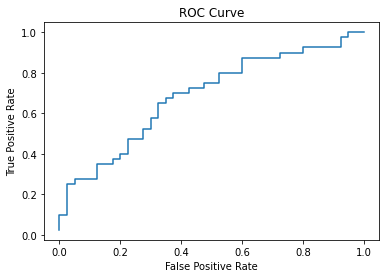

In [19]:
# Load data
iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]  # drop third class

rng = np.random.default_rng(0)
X = X + rng.normal(0, 3, size=X.shape)  # add noise to the features, so the model does not perform too well

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)

# train a simple model
model = sklearn.linear_model.LogisticRegression(random_state=0)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, -1]  # predicted probablities
fprs, tprs = roc_curve(y_test, preds)

plt.figure()
plt.plot(fprs, tprs)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
print(f"AUC = {area_under_curve(fprs, tprs):.2f}")
# sklearn.metrics.RocCurveDisplay.from_estimator(model, X_test, y_test)  # uncomment to compare with sklearn output


## Precision Recall curve

Repeat the procedure from the previous task, but with precision and recall on the y and x-axis, respectively. 
You can reuse functions from the previous tasks.

What is the relation between precision and recall?

AUC = 0.67


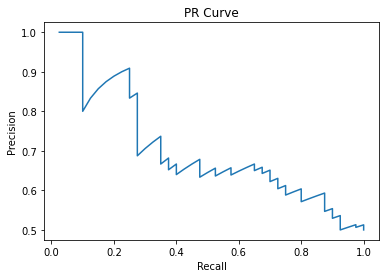

In [60]:
def pr_curve(y_true: np.ndarray, preds: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Compute the recall and precision with varying classification threshold

    Args:
        y_true (np.ndarray): binary class labels
        preds (np.ndarray): confidence scores

    Returns:
        Tuple[np.ndarray, np.ndarray]: recall, precision
    """
    recalls, precs = [], []
    for thresh in np.sort(preds):
        thresholded_preds = (preds >= thresh).astype(int)
        recalls.append(recall(y_true, thresholded_preds))
        precs.append(precision(y_true, thresholded_preds))
    return np.array(recalls), np.array(precs)


# Load data
iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]  # drop third class

rng = np.random.default_rng(0)
X = X + rng.normal(0, 3, size=X.shape)  # add noise to the features, so the model does not perform too well

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=0)

# train a simple model
model = sklearn.linear_model.LogisticRegression(random_state=0)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, -1]  # predicted probablities
recalls, precs = pr_curve(y_test, preds)

plt.figure()
plt.plot(recalls, precs)
plt.title("PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.ylim(0, 1.1)
print(f"AUC = {area_under_curve(recalls, precs):.2f}")
#sklearn.metrics.PrecisionRecallDisplay.from_estimator(model, X_test, y_test)  # uncomment to compare with sklearn output


0
